In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import torch
import os
import cv2
import albumentations as A
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.datasets as datasets
import torch
import torchvision.transforms as T
from torchvision.transforms import v2
from albumentations.pytorch import ToTensorV2
import torch.nn.functional as F
from torchvision.models import vgg16, VGG16_Weights
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import pandas as pd
from torch.optim.lr_scheduler import CyclicLR

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [63]:
df=pd.read_csv('test_with_pred.csv')
df

,Unnamed: 0.1,Unnamed: 0,file_path,modification,gender,hand,finger,method,id,finger_pred,hand_pred,gender_pred,id_pred
0,46088,46088,./archive/SOCOFing/Real/502__F_Left_little_fin...,0,1,1,4,0,501,4,1,0,501
1,46089,46089,./archive/SOCOFing/Real/502__F_Left_middle_fin...,0,1,1,2,0,501,1,1,0,501
2,46090,46090,./archive/SOCOFing/Real/502__F_Right_ring_fing...,0,1,0,3,0,501,1,0,0,501
3,46091,46091,./archive/SOCOFing/Real/502__F_Right_thumb_fin...,0,1,0,0,0,501,0,0,0,501
4,46092,46092,./archive/SOCOFing/Real/502__F_Left_index_fing...,0,1,1,1,0,501,2,1,0,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,55260,55260,./archive/SOCOFing/Altered/Altered-Hard/600__M...,3,0,0,3,1,599,3,0,0,599
9173,55261,55261,./archive/SOCOFing/Altered/Altered-Hard/600__M...,3,0,0,4,2,599,4,0,0,599
9174,55262,55262,./archive/SOCOFing/Altered/Altered-Hard/600__M...,3,0,0,4,1,599,4,0,0,599
9175,55263,55263,./archive/SOCOFing/Altered/Altered-Hard/600__M...,3,0,0,3,2,599,3,0,0,599


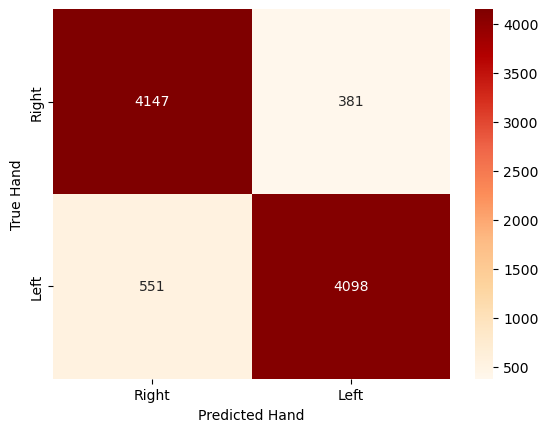

In [67]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(df['hand'],df['hand_pred'])
conf
sns.heatmap(conf, annot=True, cmap="OrRd", fmt=".0f", xticklabels=['Right', 'Left'], yticklabels=['Right', 'Left'])

# Set axis labels
plt.xlabel('Predicted Hand')
plt.ylabel('True Hand')

# Show the plot
plt.show()

In [40]:
(conf[0,0]+conf[1,1])/len(df)

0.8984417565653263

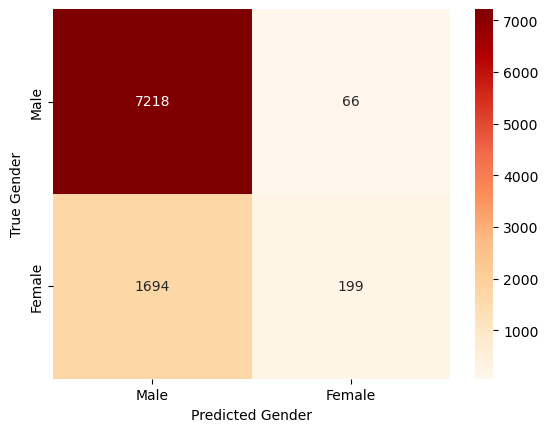

In [66]:
#df2=df[df['hand']==0]
#df2=df[~df['finger'].between(0,3)]
#df2=df2[df2['gender']==1]
#print(df2.finger.unique)
# Assuming df['gender'] and df['gender_pred'] are your data
conf = confusion_matrix(df['gender'], df['gender_pred'])

# Create the heatmap
sns.heatmap(conf, annot=True, cmap="OrRd", fmt=".0f", xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])

# Set axis labels
plt.xlabel('Predicted Gender')
plt.ylabel('True Gender')

# Show the plot
plt.show()

In [60]:
(conf[0,0]+conf[1,1])/len(df2)

0.8176308539944903

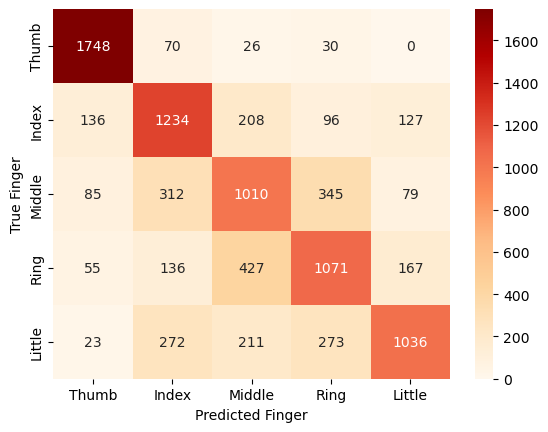

In [68]:
conf=confusion_matrix(df['finger'],df['finger_pred'])
conf
sns.heatmap(conf, annot=True, cmap="OrRd", fmt=".0f", xticklabels=['Thumb', 'Index','Middle','Ring','Little'], yticklabels=['Thumb', 'Index','Middle','Ring','Little'])

# Set axis labels
plt.xlabel('Predicted Finger')
plt.ylabel('True Finger')

# Show the plot
plt.show()

In [69]:
(conf[0,0]+conf[1,1]+conf[2,2]+conf[3,3]+conf[4,4])/len(df)

0.6645962732919255